In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from IPython.display import clear_output
from rdkit import DataStructs
from rdkit.Chem import AllChem
from scipy.stats.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

def read_merged_data(input_file_list, usecols=None):
    whole_pd = pd.DataFrame()
    for input_file in input_file_list:
        data_pd = pd.read_csv(input_file, usecols=usecols)
        whole_pd = whole_pd.append(data_pd)
    return whole_pd

file_list = ['./pria_rmi_cv/file_{}.csv'.format(i) for i in range(5)]
train_pd = read_merged_data(file_list)
test_pd = pd.read_csv('./updated_dataset/pria_prospective.csv.gz')
test_reg = test_pd['Keck_Pria_Continuous'].as_matrix()

fold_np = np.load('./job_results_pred/neural_networks/stage_2/single_classification_22/fold_0.npz')
labels, y_tr, y_v, y_te, y_pred_on_train, y_pred_on_val, y_pred_on_test = fold_np['labels'], fold_np['y_train'], fold_np['y_val'], fold_np['y_test'], fold_np['y_pred_on_train'], fold_np['y_pred_on_val'], fold_np['y_pred_on_test']
y_stnnc_a = y_pred_on_test[:,0]

fold_np = np.load('./job_results_pred/neural_networks/stage_2/single_regression_11/fold_0.npz')
labels, y_tr, y_v, y_te, y_pred_on_train, y_pred_on_val, y_pred_on_test = fold_np['labels'], fold_np['y_train'], fold_np['y_val'], fold_np['y_test'], fold_np['y_pred_on_train'], fold_np['y_pred_on_val'], fold_np['y_pred_on_test']
y_stnnr_b = y_pred_on_test[:,0]

fold_np = np.load('./job_results_pred/random_forest/stage_2/sklearn_rf_392335_97/fold_0.npz')
labels, y_tr, y_v, y_te, y_pred_on_train, y_pred_on_val, y_pred_on_test = fold_np['labels'], fold_np['y_train'], fold_np['y_val'], fold_np['y_test'], fold_np['y_pred_on_train'], fold_np['y_pred_on_val'], fold_np['y_pred_on_test']
y_rf_h = y_pred_on_test[:,0]

STNN-C_a spearman correlation=-0.0175, pvalue=0.0089
STNN-C_a pearson correlation=0.0691, pvalue=0.0000


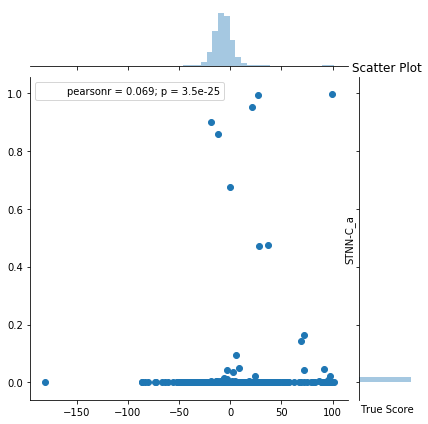

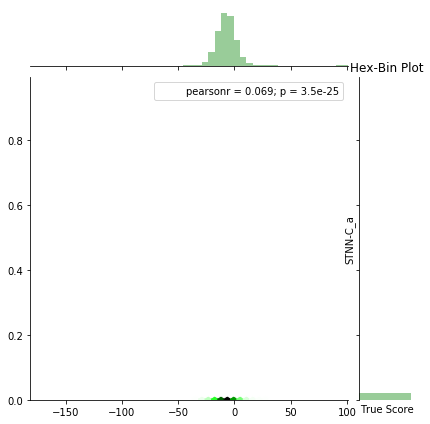

In [2]:
spearman_res = spearmanr(test_reg, y_stnnc_a)
pearson_res = pearsonr(test_reg, y_stnnc_a)
print('STNN-C_a spearman correlation={:.4f}, pvalue={:.4f}'.format(spearman_res[0], spearman_res[1]))
print('STNN-C_a pearson correlation={:.4f}, pvalue={:.4f}'.format(pearson_res[0], pearson_res[1]))
sns.jointplot(test_reg, y_stnnc_a); plt.xlabel('True Score'); plt.ylabel('STNN-C_a'); plt.title('Scatter Plot');
sns.jointplot(test_reg, y_stnnc_a, kind="hex", color="g"); plt.xlabel('True Score'); plt.ylabel('STNN-C_a'); plt.title('Hex-Bin Plot');

STNN-R_b spearman correlation=0.0688, pvalue=0.0000
STNN-R_b pearson correlation=0.1716, pvalue=0.0000


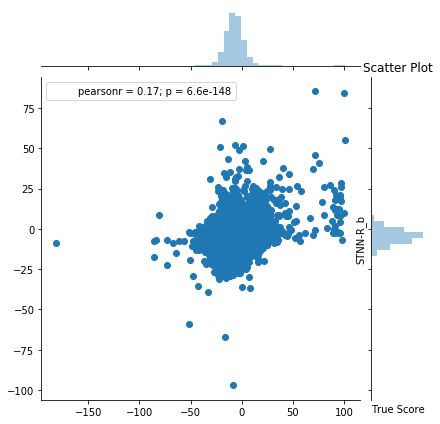

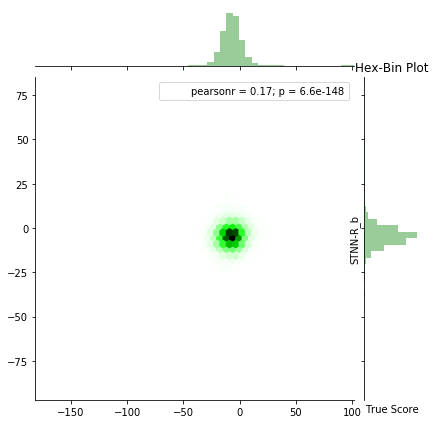

In [3]:
spearman_res = spearmanr(test_reg, y_stnnr_b)
pearson_res = pearsonr(test_reg, y_stnnr_b)
print('STNN-R_b spearman correlation={:.4f}, pvalue={:.4f}'.format(spearman_res[0], spearman_res[1]))
print('STNN-R_b pearson correlation={:.4f}, pvalue={:.4f}'.format(pearson_res[0], pearson_res[1]))
sns.jointplot(test_reg, y_stnnr_b); plt.xlabel('True Score'); plt.ylabel('STNN-R_b'); plt.title('Scatter Plot');
sns.jointplot(test_reg, y_stnnr_b, kind="hex", color="g"); plt.xlabel('True Score'); plt.ylabel('STNN-R_b'); plt.title('Hex-Bin Plot');

RF_h spearman correlation=0.0255, pvalue=0.0001
RF_h pearson correlation=0.2357, pvalue=0.0000


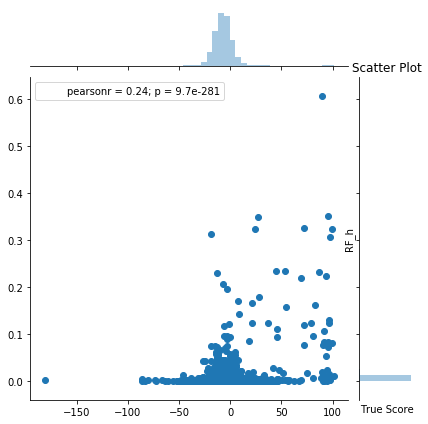

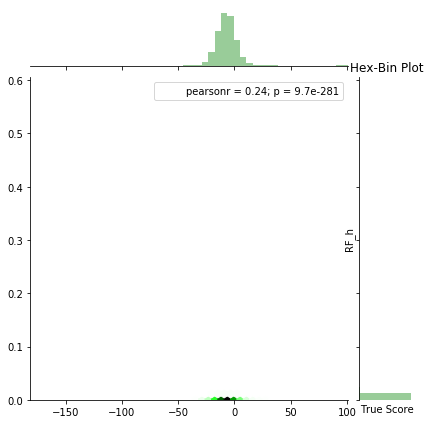

In [4]:
spearman_res = spearmanr(test_reg, y_rf_h)
pearson_res = pearsonr(test_reg, y_rf_h)
print('RF_h spearman correlation={:.4f}, pvalue={:.4f}'.format(spearman_res[0], spearman_res[1]))
print('RF_h pearson correlation={:.4f}, pvalue={:.4f}'.format(pearson_res[0], pearson_res[1]))
sns.jointplot(test_reg, y_rf_h); plt.xlabel('True Score'); plt.ylabel('RF_h'); plt.title('Scatter Plot');
sns.jointplot(test_reg, y_rf_h, kind="hex", color="g"); plt.xlabel('True Score'); plt.ylabel('RF_h'); plt.title('Hex-Bin Plot');